In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime
from numpy import dtype

In [3]:
direcorty_path = Path.cwd().parent

In [4]:
train = pd.read_csv(direcorty_path / 'data' / 'raw' /'train.csv')
test = pd.read_csv(direcorty_path / 'data' / 'raw' /'test.csv')

In [5]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
train.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Airbags'}>, <Axes: >]], dtype=object)

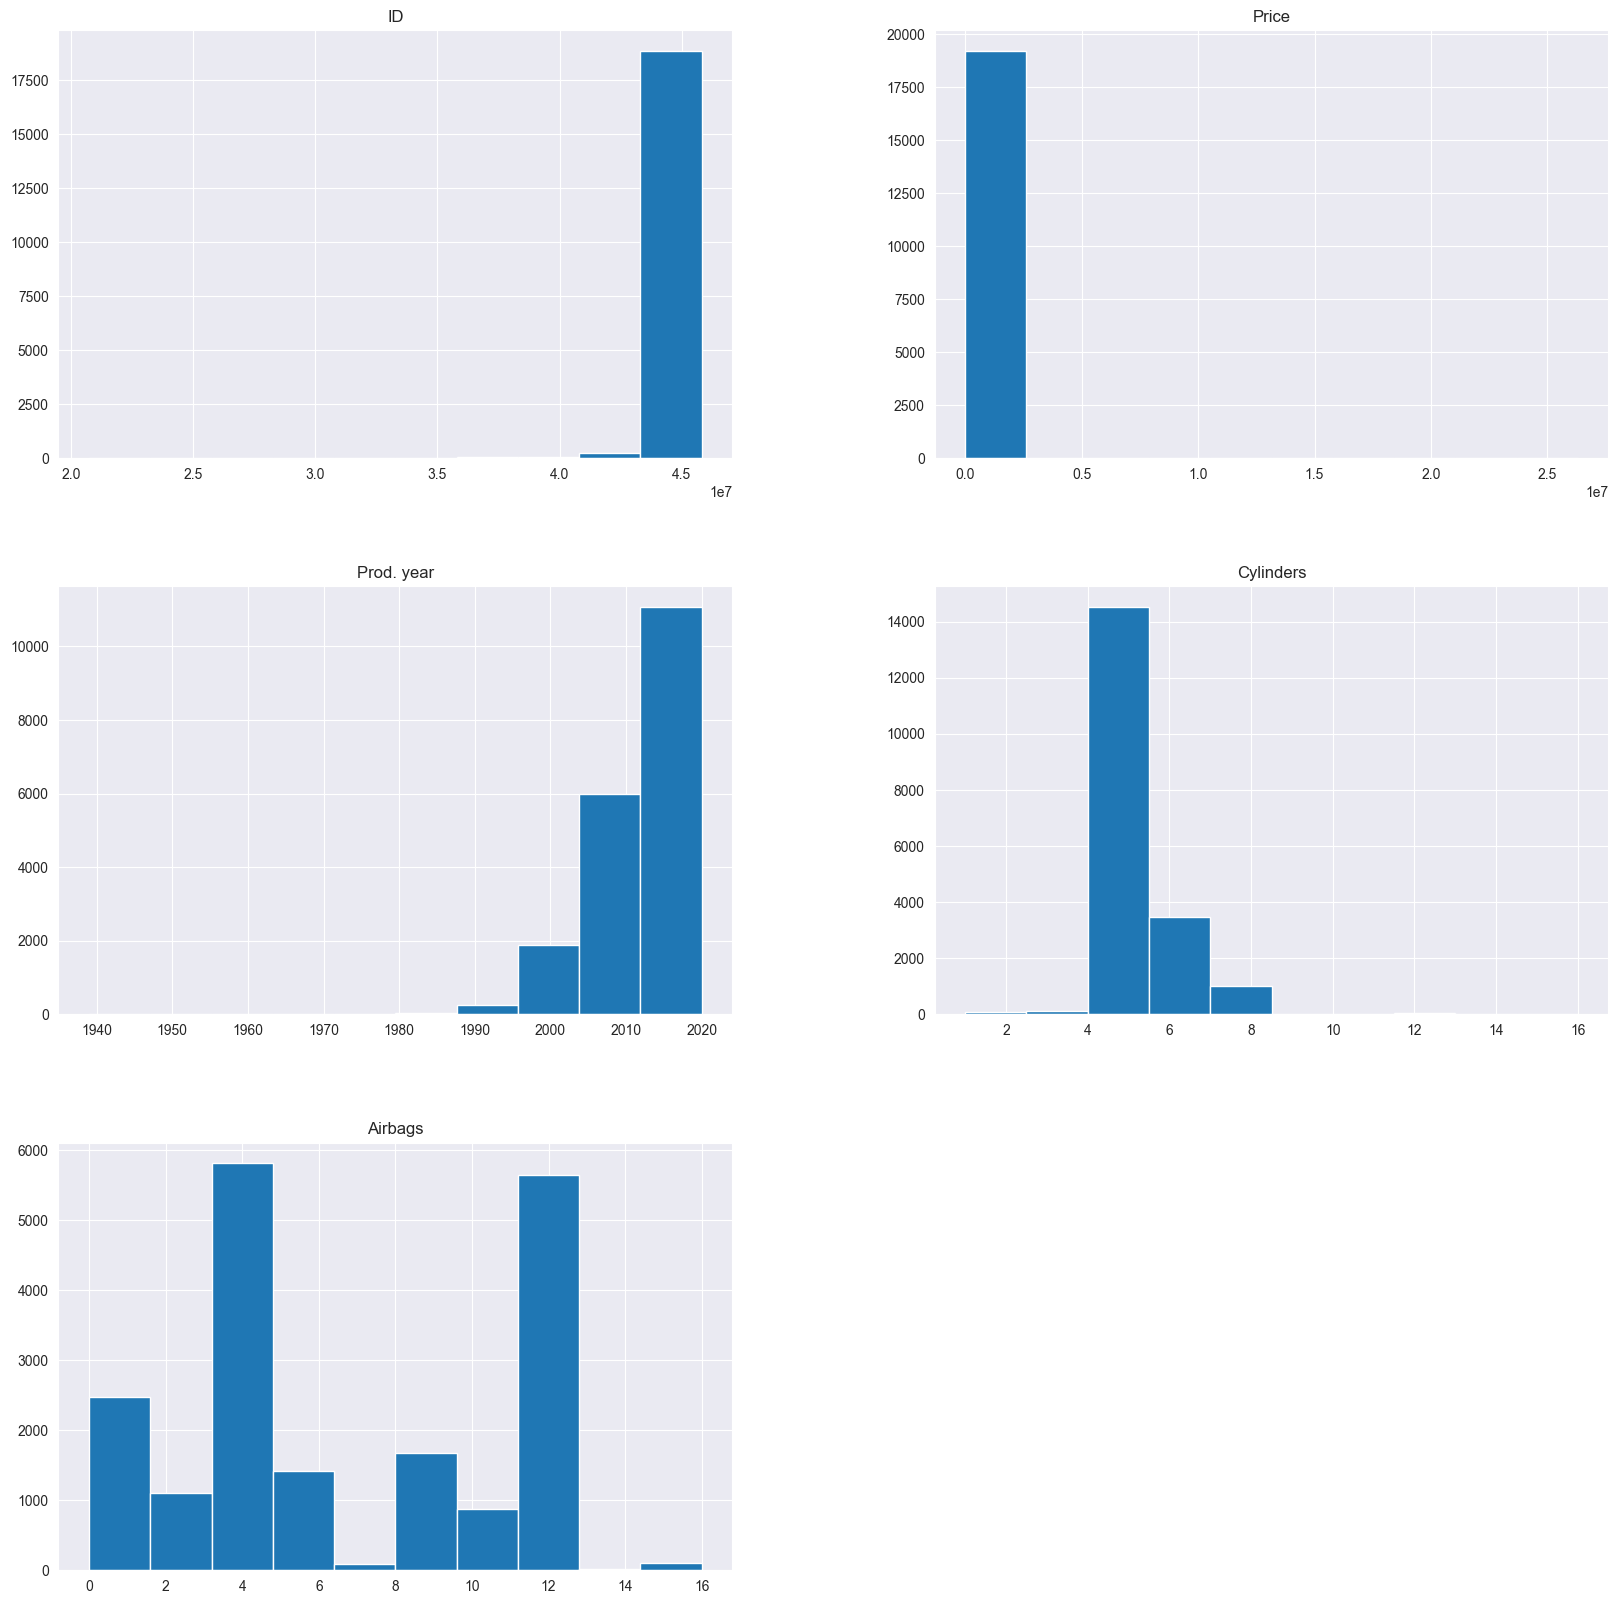

In [9]:
train.hist(figsize=(20,20))

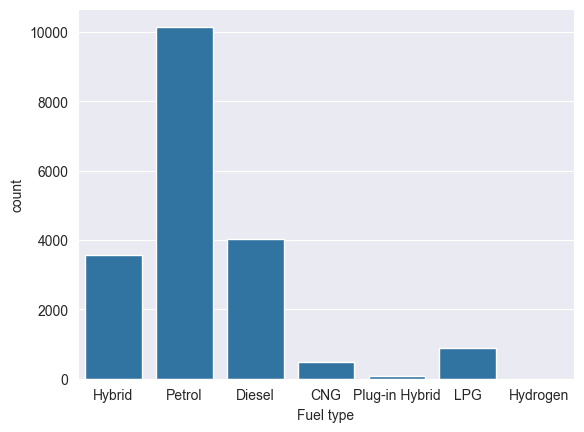

In [10]:
sns.countplot(data=train, x = 'Fuel type')
plt.show()

In [11]:
train['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [12]:
train['Levy'] = pd.to_numeric(train['Levy'], errors='coerce')

In [13]:
train['Mileage'] = (train['Mileage']
                   .str.replace(' km','')
)
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')

In [14]:
train['Engine volume'] = pd.to_numeric(train['Engine volume'], errors='coerce')

In [15]:
train['Doors'] = (train['Doors']
                  .str.replace('-May','')
                  .str.replace('-Mar','')
                  .str.replace('>',''))
train['Doors'] = pd.to_numeric(train['Doors'], errors='coerce')
print(train['Doors'].unique())

[4 2 5]


In [16]:
train = train.drop(columns = ['ID'])

In [17]:
from datetime import datetime
current_year = datetime.now().year
train["Age"] = current_year - train["Prod. year"]
train.drop(columns=["Prod. year"], inplace=True)

In [18]:
numerical_cols = train.select_dtypes(exclude=['object']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

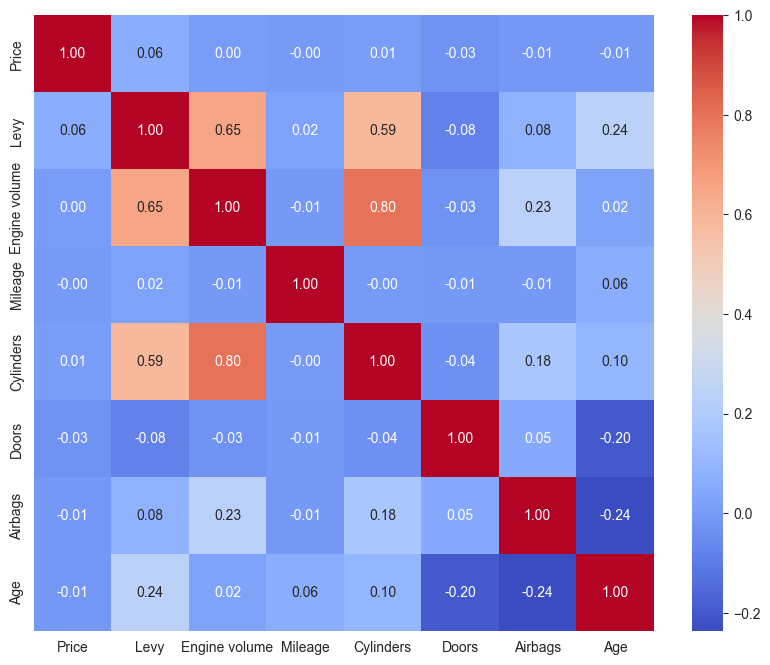

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(train[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [39]:
len(train['Model'].unique())

1590

In [24]:
train

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,15
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14
2,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,19
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,14
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,NaN,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,26
19233,15681,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,14
19234,26108,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,15
19235,5331,1288.0,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,18


In [43]:
xyz = train["Levy"].value_counts()

In [47]:
xyx = xyz[xyz < 0.01*len(xyz)]
xyx

Levy
2108.0    5
1342.0    5
1391.0    5
1132.0    5
800.0     5
         ..
2308.0    1
4860.0    1
1641.0    1
1045.0    1
1901.0    1
Name: count, Length: 329, dtype: int64